# Calculations to find the quadratic form of the octahedron packing

$P$ is the matrix of the quadratic form corresponding to $h_1^2 + h_2^2 - \tilde{b}b = 1$.

In [1]:
P = matrix([
    [0, -1/2, 0, 0],
    [-1/2, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

In [2]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

For an Apollonian packing, you can make a matrix, $W$, where the rows are the coordinates of each of the circles in a quadruple. In an octahedral packing, this is impossible, as there are six circles in a unit. You can try creating a $6\times 4$ matrix, but, later, we end up needing to invert $WPW^T$, the product of a $6\times 4$, $4\times 4$, and $4\times 6$ matrix, which is singular. Fortunately, the sextuples come in three pairs of circles. Each pair consists of circles that aren't tangent to each other. For whatever reason (we aren't sure yet why, but the Guettler and Mallows says this is the case), the average of the coordinates of the circles in a pair is the same across the sextuple. So, we can make a matrix where the first three rows are the coordinates of circles from different pairs, i.e. three mutually tangent circles, and the fourth is the average of the coordinates in a pair. From this, you can recover the coordinates for all the circles in a sextuple.

Here $W$ is such a matrix computed for the $(0, 0, 1, 1, 2, 2)$ root sextuple.

In [3]:
W = matrix([
    [2, 0, 0, 1],
    [2, 0, 0, -1],
    [-1, 1, 0, 0],
    [3, 1, sqrt(2), 0]
])

Here we have $$
    WPW^T = \left(\begin{matrix}
        1 & -1 & -1 & -1\\
        -1 & 1 & -1 & -1\\
        -1 & -1 & 1 & -1\\
        -1 & -1 & -1 & -1
    \end{matrix}\right) = M
$$
So, inverting both sides, we get $$
    (WPW^T)^{-1} = M^{-1}
$$ $$
    (W^T)^{-1}P^{-1}W^{-1} = M^{-1}
$$ $$
    P^{-1} = W^TM^{-1}W
.$$

Like in the case with Apollonian packings, this is true for any sextuple $W$. So, we can substitute an arbitrary sextuple for $W$ and it must be equal to $P^{-1}$, letting us derive some useful quadratic forms.

In [4]:
M = W * P * W.transpose()
M

[ 1 -1 -1 -1]
[-1  1 -1 -1]
[-1 -1  1 -1]
[-1 -1 -1 -1]

In [5]:
M.inverse()

[ 1/2    0    0 -1/2]
[   0  1/2    0 -1/2]
[   0    0  1/2 -1/2]
[-1/2 -1/2 -1/2  1/2]

In [6]:
bt1 = var('bt1')
b1  = var('b1')
h11 = var('h11')
h12 = var('h12')
bt2 = var('bt2')
b2  = var('b2')
h21 = var('h21')
h22 = var('h22')
bt3 = var('bt3')
b3  = var('b3')
h31 = var('h31')
h32 = var('h32')
b5_avg = var('b5_avg')
b_avg  = var('b_avg')
h1_avg = var('h1_avg')
h2_avg = var('h2_avg')


W2 = matrix([
    [bt1, b1, h11, h12],
    [bt2, b2, h21, h22],
    [bt3, b3, h31, h32],
    [b5_avg, b_avg, h1_avg, h2_avg],
])

In [7]:
D = W2.transpose() * M.inverse() * W2

In [8]:
P.inverse()

[ 0 -2  0  0]
[-2  0  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

In [9]:
quad = 2 * factor(simplify(D[1][1]))
solve(quad == 0, b_avg)

[b_avg == b1 + b2 + b3 - sqrt(2*b1*b2 + 2*(b1 + b2)*b3), b_avg == b1 + b2 + b3 + sqrt(2*b1*b2 + 2*(b1 + b2)*b3)]

In [10]:
quad

b1^2 + b2^2 + b3^2 - 2*b1*b_avg - 2*b2*b_avg - 2*b3*b_avg + b_avg^2

So, we end up deriving the quadratic form $$
    b_1^2 + b_2^2 + b_3^2 + b_{\text{avg}}^2 - 2b_{\text{avg}}(b_1 + b_2 + b_3) = 0
.$$

This means that, given three mutually tangent circles with curvatures $b_1,b_2,b_3$, there are two solutions for $b_{\text{avg}}$, allowing us to derive two new sets of three mutually tangent circles with curvatures $b_1' = 2b_{\text{avg}} - b_1$ etc.

In [11]:
factor(simplify(D[2][1]))

1/2*b1*h11 - 1/2*b_avg*h11 - 1/2*b1*h1_avg - 1/2*b2*h1_avg - 1/2*b3*h1_avg + 1/2*b_avg*h1_avg + 1/2*b2*h21 - 1/2*b_avg*h21 + 1/2*b3*h31 - 1/2*b_avg*h31

# Calculations to find the curvatures of the dual circles of the octahedral packing

Here the basic idea was to work out the intersection points of the circles and let the computer algebraically find the radii of the circles. The end up coming out, rather anticlimactically, to $(0, 0, \sqrt 2, \sqrt 2, \sqrt 2, \sqrt 2, 2\sqrt 2, 2\sqrt 2)$. It's rather satisfying and a bit surprising that the dual of the root sextuple of the octahedral packing is the root of the cubic packing, since the dual polyhedron of the octahedron is the cube.

In [12]:
def circle_from_points(pta, ptb, ptc):
    a = var('a')
    b = var('b')
    r = var('r')
    x = var('x')
    y = var('y')
    
    circle_func = (x - a)^2 + (y - b)^2 == r^2
    
    eq1 = circle_func.subs(x == pta[0]).subs(y == pta[1])
    eq2 = circle_func.subs(x == ptb[0]).subs(y == ptb[1])
    eq3 = circle_func.subs(x == ptc[0]).subs(y == ptc[1])
    
    res = solve([eq1, eq2, eq3], a, b, r)[1]
    
    return (res[0].rhs(), res[1].rhs(), res[2].rhs())

(1/2*sqrt(2), 1)
sqrt(2)
(1/4*sqrt(2), 0)
2*sqrt(2)


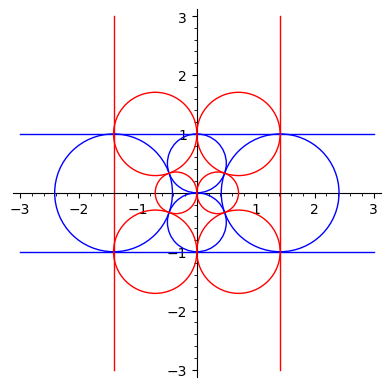

In [13]:
c1 = line([(-3, 1), (3, 1)])
c2 = line([(-3, -1), (3, -1)])
c3 = circle((-sqrt(2), 0), 1)
c4 = circle((sqrt(2), 0), 1)
c5 = circle((0, 1/2), 1/2)
c6 = circle((0, -1/2), 1/2)

b1 = line([(-sqrt(2), -3), (-sqrt(2), 3)], rgbcolor=(1, 0, 0))
b2 = line([(sqrt(2), -3), (sqrt(2), 3)], rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 1), (sqrt(2), 1))
print('({}, {})'.format(x, y))
print(1 / r)

b3 = circle(( x,  y), r, rgbcolor=(1, 0, 0))
b4 = circle((-x,  y), r, rgbcolor=(1, 0, 0))
b5 = circle(( x, -y), r, rgbcolor=(1, 0, 0))
b6 = circle((-x, -y), r, rgbcolor=(1, 0, 0))

x, y, r = circle_from_points((sqrt(2) / 3, 1 / 3), (0, 0), (sqrt(2) / 3, -1 / 3))
print('({}, {})'.format(x, y))
print(1 / r)

b7 = circle(( x, y), r, rgbcolor=(1, 0, 0))
b8 = circle((-x, y), r, rgbcolor=(1, 0, 0))

show(c1 + c2 + c3 + c4 + c5 + c6 + b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8)

# Futile attempt to derive the quadratic form for the cubic packing

We attempted to derive the quadratic form for the cubic packing based on the data collected above, but the results don't match the results from the Stange at all and are significantly uglier. There's probably a mistake in here somewhere, but I'm not sure where.

In [14]:
def abbc_coords(b, h1, h2):
    return [(h1^2 + h2^2 - 1) / b, b, h1, h2]

In [15]:
Wc = matrix([
    abbc_coords(sqrt(2), -1, sqrt(2)),
    abbc_coords(2*sqrt(2), 1, 0),
    abbc_coords(sqrt(2), -1, -sqrt(2)),
    [sqrt(2) / 4, 0, 1, 0],
    abbc_coords(sqrt(2), 1, sqrt(2)),
    abbc_coords(2*sqrt(2), -1, 0),
    abbc_coords(sqrt(2), 1, -sqrt(2)),
    [sqrt(2) / 4, 0, -1, 0]

])

Wc * P * Wc.transpose()

[   1   -3   -3 -5/4   -1   -1   -5  3/4]
[  -3    1   -3  1/2   -1   -1   -1 -3/2]
[  -3   -3    1 -5/4   -5   -1   -1  3/4]
[-5/4  1/2 -5/4    1  3/4 -3/2  3/4   -1]
[  -1   -1   -5  3/4    1   -3   -3 -5/4]
[  -1   -1   -1 -3/2   -3    1   -3  1/2]
[  -5   -1   -1  3/4   -3   -3    1 -5/4]
[ 3/4 -3/2  3/4   -1 -5/4  1/2 -5/4    1]

In [16]:
W = matrix([
    abbc_coords(sqrt(2), -1, sqrt(2)),
    abbc_coords(2*sqrt(2), 1, 0),
    abbc_coords(sqrt(2), -1, -sqrt(2)),
    [sqrt(2) / 4, 0, 1, 0]
])

In [17]:
m = W * P * W.transpose()
m

[   1   -3   -3 -5/4]
[  -3    1   -3  1/2]
[  -3   -3    1 -5/4]
[-5/4  1/2 -5/4    1]

In [18]:
D = W2.transpose() * m.inverse() * W2
968*factor(simplify(D[1][1]))

97*b1^2 - 304*b1*b2 + 328*b2^2 - 290*b1*b3 - 304*b2*b3 + 97*b3^2 + 32*b1*b_avg - 1088*b2*b_avg + 32*b3*b_avg + 1280*b_avg^2